<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dia 2 - REDES CONVOLUCIONAIS DE CLASSIFICAÇÃO (Testando vários classificadores)

In [1]:
from sklearn.datasets import fetch_openml

# Carregar os dados MNIST
mnist = fetch_openml('mnist_784', version=1, parser="pandas")
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

#Convertendo para uma matriz numpy ao invés de dataframe.
X = X.to_numpy()
Y = y.to_numpy()
X.shape, Y.shape

((70000, 784), (70000,))

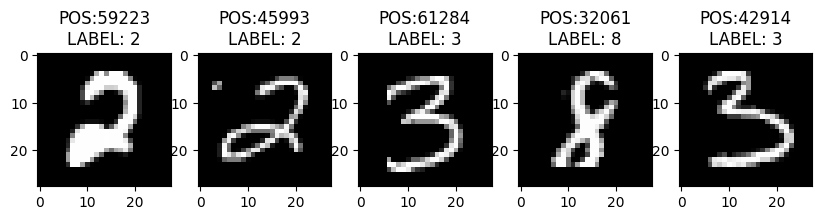

In [2]:
import random
import matplotlib.pyplot as plt
j=1
plt.figure(figsize=(10,10))
for i in random.sample(range(len(X)), 5):
  plt.subplot(1,5,j)
  plt.title(f"POS:{i}\nLABEL: {Y[i]}")
  plt.imshow(X[i].reshape((28,28)), cmap="gray")
  j+=1
plt.show()

# Experimento 1 - Rede neural densa

In [3]:
import numpy as np
Y2 = np.array([np.eye(10)[_] for _ in Y])
Y2[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, test_size=0.2, random_state=42)
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((56000, 784), (14000, 784), (56000, 10), (14000, 10))

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define o modelo sequencial
model = models.Sequential()

# Adiciona a camada de entrada e a primeira camada oculta
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))

# Adiciona a camada de saída
model.add(layers.Dense(10, activation='softmax'))

# Compila o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3113 - accuracy: 0.9135 - val_loss: 0.1892 - val_accuracy: 0.9464
Epoch 2/30
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1494 - accuracy: 0.9563 - val_loss: 0.1376 - val_accuracy: 0.9611
Epoch 3/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9687 - val_loss: 0.1266 - val_accuracy: 0.9622
Epoch 4/30
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0843 - accuracy: 0.9741 - val_loss: 0.1176 - val_accuracy: 0.9646
Epoch 5/30
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.1076 - val_accuracy: 0.9669
Epoch 6/30
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0569 - accuracy: 0.9819 - val_loss: 0.1149 - val_accuracy: 0.9668
Epoch 7/30
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.1013 - val_accuracy:

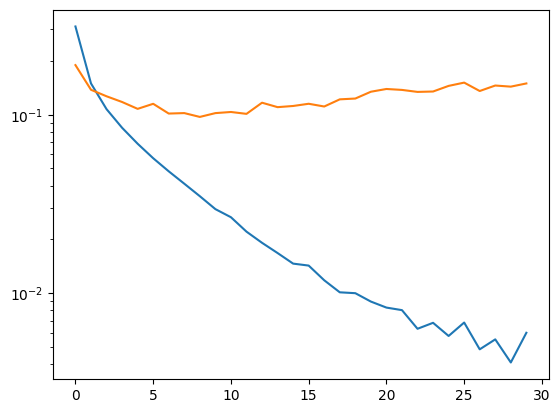

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.yscale("log")


In [15]:
X_train2 = X_train.reshape( (-1,28,28,1) )
X_test2 = X_test.reshape( (-1,28,28,1) )
X_train2 = np.pad(X_train2,((0,0),(2,2),(2,2),(0,0)))
X_test2 = np.pad(X_test2,((0,0),(2,2),(2,2),(0,0)))

In [16]:
import tensorflow as tf
from tensorflow.keras import models, layers

model2 = models.Sequential([
    # C1: Camada de Convolução
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
    # S2: Camada de Subamostragem
    layers.AveragePooling2D(pool_size=(2, 2)),

    # C3: Camada de Convolução
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    # S4: Camada de Subamostragem
    layers.AveragePooling2D(pool_size=(2, 2)),

    # C5: Camada de Convolução, atua como uma camada densa pela forma como é aplicada
    layers.Conv2D(120, kernel_size=(5, 5), activation='relu'),

    # Flatten antes das camadas densas
    layers.Flatten(),

    # F6: Camada Densa
    layers.Dense(84, activation='relu'),

    # Camada de Saída
    layers.Dense(10, activation='softmax')
])

# Compila o modelo
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostra um resumo do modelo
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [17]:
history = model2.fit(X_train2[:100], Y_train[:100], epochs=30, validation_data=(X_test2, Y_test))

Epoch 1/30
4/4 [==============================] - 3s 633ms/step - loss: 2.2998 - accuracy: 0.1500 - val_loss: 2.2809 - val_accuracy: 0.3420
Epoch 2/30
4/4 [==============================] - 2s 574ms/step - loss: 2.2651 - accuracy: 0.4300 - val_loss: 2.2440 - val_accuracy: 0.3295
Epoch 3/30
4/4 [==============================] - 2s 572ms/step - loss: 2.2171 - accuracy: 0.3900 - val_loss: 2.1796 - val_accuracy: 0.3737
Epoch 4/30
4/4 [==============================] - 3s 861ms/step - loss: 2.1248 - accuracy: 0.4700 - val_loss: 2.0680 - val_accuracy: 0.4631
Epoch 5/30
4/4 [==============================] - 2s 587ms/step - loss: 1.9926 - accuracy: 0.5600 - val_loss: 1.9217 - val_accuracy: 0.6019
Epoch 6/30
4/4 [==============================] - 2s 589ms/step - loss: 1.8433 - accuracy: 0.6300 - val_loss: 1.7646 - val_accuracy: 0.5043
Epoch 7/30
4/4 [==============================] - 2s 594ms/step - loss: 1.6172 - accuracy: 0.5700 - val_loss: 1.7198 - val_accuracy: 0.3747
Epoch 8/30
4/4 [====

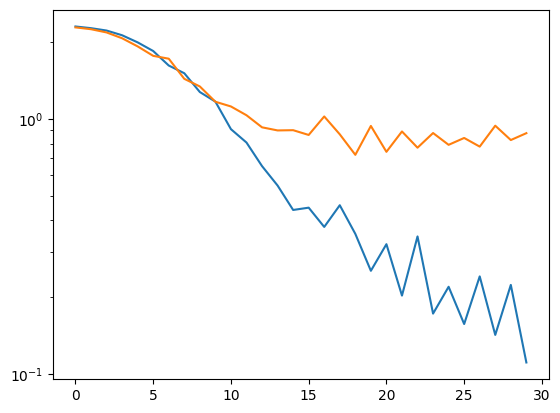

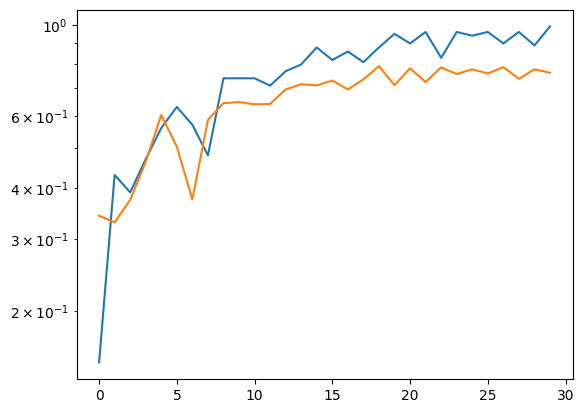

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.yscale("log")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.yscale("log")

In [ ]:
history = model2.fit(X_train2, Y_train, epochs=30, validation_data=(X_test2, Y_test))

Epoch 1/30
1750/1750 [==============================] - 33s 19ms/step - loss: 0.2330 - accuracy: 0.9282 - val_loss: 0.1020 - val_accuracy: 0.9691
Epoch 2/30
1750/1750 [==============================] - 33s 19ms/step - loss: 0.0745 - accuracy: 0.9766 - val_loss: 0.0729 - val_accuracy: 0.9778
Epoch 3/30
1750/1750 [==============================] - 34s 20ms/step - loss: 0.0535 - accuracy: 0.9828 - val_loss: 0.0648 - val_accuracy: 0.9796
Epoch 4/30
1750/1750 [==============================] - 32s 18ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0569 - val_accuracy: 0.9824
Epoch 5/30
1750/1750 [==============================] - 33s 19ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0472 - val_accuracy: 0.9864
Epoch 6/30
1750/1750 [==============================] - 32s 18ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0372 - val_accuracy: 0.9884
Epoch 7/30
1750/1750 [==============================] - 33s 19ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0451 -

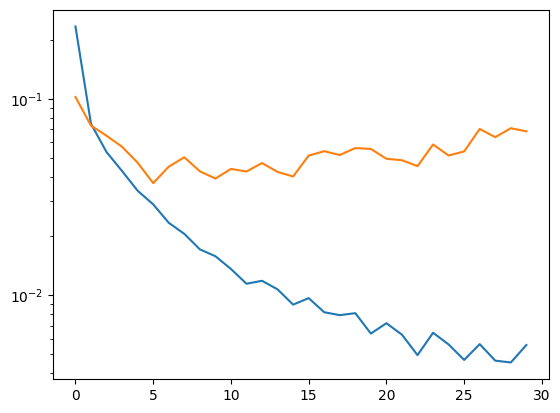

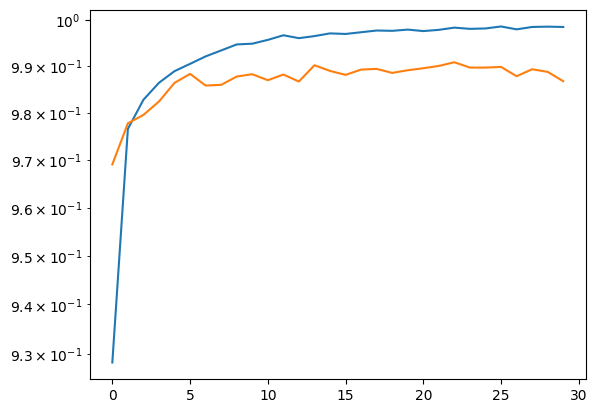

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.yscale("log")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.yscale("log")

In [ ]:
model2.layers[-3].output_shape

(None, 120)

In [ ]:
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model2.input, outputs=model2.layers[-3].output)

In [ ]:
embeddings_train = intermediate_layer_model.predict(X_train2)

1750/1750 [==============================] - 13s 7ms/step


In [ ]:
Y_cattegorical = np.argmax(Y_train, axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier(n_estimators=20, random_state=42)


In [ ]:
model3.fit(embeddings_train, Y_cattegorical)

RandomForestClassifier(n_estimators=20, random_state=42)

In [ ]:
(model3.predict(embeddings_train)==Y_cattegorical).sum()/len(embeddings_train)

0.9999821428571428

In [ ]:
model2.predict(X_train2)

1750/1750 [==============================] - 13s 7ms/step


array([[5.6126190e-15, 1.5669035e-13, 6.6302424e-19, ..., 8.9635945e-17,
        8.9168825e-11, 7.8799689e-10],
       [4.5582330e-19, 2.3789452e-15, 1.2896348e-17, ..., 5.3262831e-14,
        4.4026713e-16, 4.1187672e-15],
       [1.2448975e-09, 2.4506417e-07, 7.4558244e-08, ..., 1.4059589e-08,
        9.9990338e-01, 1.0387992e-08],
       ...,
       [3.4517875e-21, 9.9999994e-01, 3.9053644e-21, ..., 3.0170453e-16,
        9.6906308e-16, 1.5012972e-16],
       [9.9999994e-01, 4.3376131e-28, 4.6833963e-26, ..., 3.5738073e-31,
        3.7296546e-28, 6.3313764e-27],
       [9.9999994e-01, 1.8606010e-14, 6.0680287e-11, ..., 2.7483861e-13,
        2.3164257e-14, 9.1311062e-19]], dtype=float32)

In [ ]:
%timeit model3.predict(embeddings_train)

225 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
(model3.predict(intermediate_layer_model(X_test2))==np.argmax(Y_test, axis=1)).sum()/len(X_test2)

0.9879285714285714

In [ ]:
np.argmax(Y_test, axis=1)

array([8, 4, 8, ..., 2, 7, 1])

In [ ]:
classisfier_layer_model = Model(inputs=model2.layers[-2].input, outputs=model2.output)

In [ ]:
np.argmax(classisfier_layer_model.predict(embeddings_train), axis=-1)

1750/1750 [==============================] - 3s 2ms/step


array([5, 4, 8, ..., 1, 0, 0])